In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf 

# Read data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Chia tập train test

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
df_train_val = df_train.copy()

In [ ]:
df_train, df_val = train_test_split(df_train, test_size=0.25, shuffle=True, random_state=1)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((240, 3), (80, 3), (80, 3))

# Chuẩn hóa dữ liệu

In [ ]:
X_train = df_train.drop(columns=['Purchased'])
y_train = df_train['Purchased']

In [ ]:
X_val = df_val.drop(columns=['Purchased'])
y_val = df_val['Purchased']

In [ ]:
X_test = df_test.drop(columns=['Purchased'])
y_test = df_test['Purchased']

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
X_test = StandardScaler().fit_transform(X_test)

# Các siêu tham số 

In [ ]:
param = {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'C': [0.1, 1, 10, 100, 1000],
            'shrinking': [True, False],
            'degree': [0, 1, 2, 3, 4, 5, 6],
        }

# GridSearchCV


In [ ]:
best_param = {'kernel': [], 'gamma': [], 'C': [], 'shrinking': [], 'degree': []}
best_score = -1

In [ ]:
kernel_best, gamma_best, C_best, shrinking_best, best_degree = "", "", -100, "", -100
for kernel in param['kernel']:
    for gamma in param['gamma']:
        for C in param['C']:
            for shrinking in param['shrinking']:
                for degree in param['degree']:
                    model = SVC(kernel=kernel, gamma=gamma, C=C, shrinking=shrinking, degree=degree)
                    model.fit(X_train, y_train)
                    accuracy = accuracy_score(y_val, model.predict(X_val))
                    if accuracy > best_score:
                        best_score = accuracy 
                        kernel_best = kernel
                        gamma_best = gamma
                        C_best = C
                        shrinking_best = shrinking
                        best_degree=degree

In [ ]:
best_param['kernel'].append(kernel_best)
best_param['gamma'].append(gamma_best)
best_param['C'].append(C_best)
best_param['shrinking'].append(shrinking_best)
best_param['degree'].append(degree)

In [ ]:
best_param

{'C': [1],
 'degree': [6],
 'gamma': ['scale'],
 'kernel': ['rbf'],
 'shrinking': [True]}

# Test

In [ ]:
df_train_val

,Age,EstimatedSalary,Purchased
93,29,28000,0
23,45,22000,1
299,46,117000,1
13,32,18000,0
90,22,81000,0
...,...,...,...
255,52,90000,1
72,20,23000,0
396,51,23000,1
235,46,79000,1


In [ ]:
X_train_val = df_train_val.drop(columns=['Purchased'])
y_train_val = df_train_val['Purchased']

In [ ]:
X_train_val = StandardScaler().fit_transform(X_train_val)
X_train_val

array([[-0.80330081, -1.19121795],
       [ 0.75697997, -1.36859801],
       [ 0.85449752,  1.43991958],
       [-0.51074816, -1.48685138],
       [-1.48592365,  0.37563923],
       [-1.19337101,  0.55301929],
       [ 1.04953262, -1.04340124],
       [-0.21819552, -0.30431766],
       [ 0.95201507, -1.33903467],
       [-1.09585346, -1.07296458],
       [-0.51074816,  1.97205975],
       [ 2.21974321, -1.0138379 ],
       [ 1.43960282, -1.39816136],
       [ 0.07435713, -0.39300769],
       [-1.19337101,  0.64170932],
       [ 2.02470811, -0.89558452],
       [ 1.14705017,  0.58258263],
       [-0.02316042,  0.2869492 ],
       [-0.21819552,  0.25738586],
       [-0.31571307, -0.74776781],
       [-1.68095875, -0.57038775],
       [ 0.85449752,  0.58258263],
       [-0.60826571, -1.0138379 ],
       [ 0.95201507, -1.13209127],
       [-0.21819552, -0.54082441],
       [ 0.17187468,  0.81908937],
       [-0.41323061,  1.32166621],
       [ 1.14705017,  0.52345594],
       [ 0.75697997,

In [ ]:
model = SVC(kernel=best_param['kernel'][0], 
            gamma=best_param['gamma'][0], 
            C=best_param['C'][0], 
            shrinking=best_param['shrinking'][0],
            degree=best_param['degree'][0])

model.fit(X_train_val, y_train_val)
accuracy = accuracy_score(y_test, model.predict(X_test))

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8625


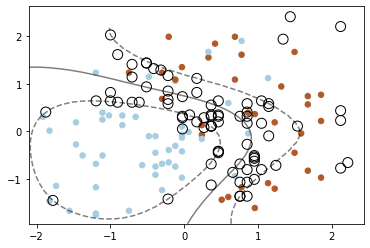

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# K-fold

In [ ]:
gd_sr = GridSearchCV(estimator=SVC(),
                     param_grid=param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                     verbose=4)
gd_sr.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [0, 1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=4)

In [ ]:
best_parameters = gd_sr.best_params_
best_parameters

{'C': 1, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

In [ ]:
best_result = gd_sr.best_score_
best_result

0.921875

In [ ]:
cv_svm = KFold(n_splits=5, random_state=1, shuffle=True)
model_cv_svm = SVC(random_state=1, 
                   degree=best_parameters['degree'],
                   C=best_parameters['C'], 
                   gamma=best_parameters['gamma'], 
                   kernel=best_parameters['kernel'],
                   shrinking=best_parameters['shrinking']
                   )

In [ ]:
test_acc_cv = cross_val_score(model_cv_svm, X_test, y_test, scoring='accuracy', cv=cv_svm, n_jobs=-1)
test_acc_cv

array([0.875 , 0.9375, 0.75  , 0.75  , 0.875 ])

In [ ]:
print(f'Accuracy: {(np.mean(test_acc_cv))}\nStandard deviation: {np.std(test_acc_cv)}')

Accuracy: 0.8375
Standard deviation: 0.075
